<a href="https://colab.research.google.com/github/killerbeelsl/weather_temperature_prediction_with_transformer/blob/main/Data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# --- Data loading and preprocessing for the .dat file ---

# Define column specifications for .dat file
colspecs_dat = [
    (0, 11), (11, 15), (15, 19), (19, 24), (24, 25), (25, 26), (26, 27),
    (27, 32), (32, 33), (33, 34), (34, 35), (35, 40), (40, 41), (41, 42), (42, 43),
    (43, 48), (48, 49), (49, 50), (50, 51), (51, 56), (56, 57), (57, 58), (58, 59),
    (59, 64), (64, 65), (65, 66), (66, 67), (67, 72), (72, 73), (73, 74), (74, 75),
    (75, 80), (80, 81), (81, 82), (82, 83), (83, 88), (88, 89), (89, 90), (90, 91),
    (91, 96), (96, 97), (97, 98), (98, 99), (99, 104), (104, 105), (105, 106), (106, 107),
    (107, 112), (112, 113), (113, 114), (114, 115)
]

# Define column names for .dat file
columns_dat = [
    "ID", "YEAR", "ELEMENT", "VALUE1", "DMFLAG1", "QCFLAG1", "DSFLAG1",
    "VALUE2", "DMFLAG2", "QCFLAG2", "DSFLAG2", "VALUE3", "DMFLAG3", "QCFLAG3", "DSFLAG3",
    "VALUE4", "DMFLAG4", "QCFLAG4", "DSFLAG4", "VALUE5", "DMFLAG5", "QCFLAG5", "DSFLAG5",
    "VALUE6", "DMFLAG6", "QCFLAG6", "DSFLAG6", "VALUE7", "DMFLAG7", "QCFLAG7", "DSFLAG7",
    "VALUE8", "DMFLAG8", "QCFLAG8", "DSFLAG8", "VALUE9", "DMFLAG9", "QCFLAG9", "DSFLAG9",
    "VALUE10", "DMFLAG10", "QCFLAG10", "DSFLAG10", "VALUE11", "DMFLAG11", "QCFLAG11", "DSFLAG11",
    "VALUE12", "DMFLAG12", "QCFLAG12", "DSFLAG12"
]

In [ ]:
# Read the fixed-width .dat file
df_dat = pd.read_fwf("ghcnm.tavg.v4.0.1.20241107.qfe.dat", colspecs=colspecs_dat, names=columns_dat, header=None)

In [ ]:
df_dat

,ID,YEAR,ELEMENT,VALUE1,DMFLAG1,QCFLAG1,DSFLAG1,VALUE2,DMFLAG2,QCFLAG2,...,QCFLAG10,DSFLAG10,VALUE11,DMFLAG11,QCFLAG11,DSFLAG11,VALUE12,DMFLAG12,QCFLAG12,DSFLAG12
0,ACW00011604,1961,TAVG,-78,NaN,NaN,k,247,NaN,NaN,...,NaN,k,521.0,NaN,NaN,k,-28.0,NaN,NaN,k
1,ACW00011604,1962,TAVG,124,NaN,NaN,k,96,NaN,NaN,...,NaN,k,334.0,NaN,NaN,k,-115.0,NaN,NaN,k
2,ACW00011604,1963,TAVG,-702,NaN,NaN,k,-542,NaN,NaN,...,NaN,k,577.0,NaN,NaN,k,-97.0,NaN,NaN,k
3,ACW00011604,1964,TAVG,73,NaN,NaN,k,-74,NaN,NaN,...,NaN,k,557.0,NaN,NaN,k,123.0,NaN,NaN,k
4,ACW00011604,1965,TAVG,55,NaN,NaN,k,-94,NaN,NaN,...,NaN,k,42.0,NaN,NaN,k,-167.0,NaN,NaN,k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36153,ASN00024536,1993,TAVG,2265,E,NaN,NaN,2211,E,NaN,...,NaN,NaN,1873.0,E,NaN,NaN,2011.0,E,NaN,NaN
36154,ASN00024536,1994,TAVG,2057,E,NaN,NaN,2133,E,NaN,...,NaN,NaN,1783.0,E,NaN,NaN,2252.0,E,NaN,NaN
36155,ASN00024536,1995,TAVG,2236,E,NaN,NaN,2265,E,NaN,...,NaN,NaN,1865.0,E,NaN,NaN,1952.0,E,NaN,NaN
36156,ASN00024536,1996,TAVG,2056,E,NaN,NaN,2165,E,NaN,...,NaN,NaN,1734.0,E,NaN,NaN,2020.0,E,NaN,NaN


In [ ]:

# 1. Filter for the specific ID
# df_dat = df_dat[df_dat['ID'] == "ACW00011604"]

# Melt the DataFrame to long format for values
df_melted_values = pd.melt(df_dat,
                           id_vars=['ID', 'YEAR'],
                           value_vars=[f'VALUE{i}' for i in range(1, 13)],
                           var_name='MONTH',
                           value_name='VALUE')

# Melt the DataFrame to long format for DMFLAG
df_melted_dmflag = pd.melt(df_dat,
                           id_vars=['ID', 'YEAR'],
                           value_vars=[f'DMFLAG{i}' for i in range(1, 13)],
                           var_name='MONTH',
                           value_name='DMFLAG')

# Melt the DataFrame to long format for QCFLAG
df_melted_qcflag = pd.melt(df_dat,
                           id_vars=['ID', 'YEAR'],
                           value_vars=[f'QCFLAG{i}' for i in range(1, 13)],
                           var_name='MONTH',
                           value_name='QCFLAG')

# # Melt the DataFrame to long format for DSFLAG
# df_melted_dsflag = pd.melt(df_dat,
#                            id_vars=['ID', 'YEAR'],
#                            value_vars=[f'DSFLAG{i}' for i in range(1, 13)],
#                            var_name='MONTH',
#                            value_name='DSFLAG')

# Extract month number from 'MONTH' column
df_melted_values['MONTH'] = df_melted_values['MONTH'].str.extract('(\d+)').astype(int)
df_melted_dmflag['MONTH'] = df_melted_dmflag['MONTH'].str.extract('(\d+)').astype(int)
df_melted_qcflag['MONTH'] = df_melted_qcflag['MONTH'].str.extract('(\d+)').astype(int)
# df_melted_dsflag['MONTH'] = df_melted_dsflag['MONTH'].str.extract('(\d+)').astype(int)

# Merge the DataFrames from .dat file
df_combined = pd.merge(df_melted_values, df_melted_dmflag, on=['ID', 'YEAR', 'MONTH'])
df_combined = pd.merge(df_combined, df_melted_qcflag, on=['ID', 'YEAR', 'MONTH'])
# df_combined = pd.merge(df_combined, df_melted_dsflag, on=['ID', 'YEAR', 'MONTH'])




In [ ]:
df_combined

,ID,YEAR,MONTH,VALUE,DMFLAG,QCFLAG
0,ACW00011604,1961,1,-78.0,NaN,NaN
1,ACW00011604,1962,1,124.0,NaN,NaN
2,ACW00011604,1963,1,-702.0,NaN,NaN
3,ACW00011604,1964,1,73.0,NaN,NaN
4,ACW00011604,1965,1,55.0,NaN,NaN
...,...,...,...,...,...,...
433891,ASN00024536,1993,12,2011.0,E,NaN
433892,ASN00024536,1994,12,2252.0,E,NaN
433893,ASN00024536,1995,12,1952.0,E,NaN
433894,ASN00024536,1996,12,2020.0,E,NaN


In [ ]:
# --- Data loading for the .inv file ---

# Define column specifications for .inv file
colspecs_inv = [(0, 11), (12, 20), (21, 30), (31, 37), (38, 68)]

# Define column names for .inv file
columns_inv = ["ID", "LATITUDE", "LONGITUDE", "STNELEV", "NAME"]

In [ ]:
# Read the fixed-width .inv file
df_inv = pd.read_fwf("ghcnm.tavg.v4.0.1.20241107.qfe.inv", colspecs=colspecs_inv, names=columns_inv, header=None)

In [ ]:
df_inv['ID'].unique()

array(['ACW00011604', 'AE000041196', 'AEM00041184', ..., 'ZIXLT371333',
       'ZIXLT443557', 'ZIXLT622116'], dtype=object)

In [ ]:

# 1. Filter for the specific ID
# df_inv = df_inv[df_inv['ID'] == "ACW00011604"]

# --- Merge the DataFrames ---

# Merge the combined .dat DataFrame with the .inv DataFrame
df_final = pd.merge(df_combined, df_inv, on='ID', how='left')



In [ ]:
df_final['Temperature'] = df_final['VALUE'].apply(lambda x: x / 100)

In [ ]:
df_final[df_final['YEAR'] == 2010].to_csv("2010_data.csv",index=False)

In [ ]:
df_final

,ID,YEAR,MONTH,VALUE,DMFLAG,QCFLAG,LATITUDE,LONGITUDE,STNELEV,NAME,Temperature
0,ACW00011604,1961,1,-78.0,NaN,NaN,57.7667,11.8667,18.0,SAVE,-0.78
1,ACW00011604,1962,1,124.0,NaN,NaN,57.7667,11.8667,18.0,SAVE,1.24
2,ACW00011604,1963,1,-702.0,NaN,NaN,57.7667,11.8667,18.0,SAVE,-7.02
3,ACW00011604,1964,1,73.0,NaN,NaN,57.7667,11.8667,18.0,SAVE,0.73
4,ACW00011604,1965,1,55.0,NaN,NaN,57.7667,11.8667,18.0,SAVE,0.55
...,...,...,...,...,...,...,...,...,...,...,...
433891,ASN00024536,1993,12,2011.0,E,NaN,-35.2546,139.4542,21.0,TAILEM_BEND,20.11
433892,ASN00024536,1994,12,2252.0,E,NaN,-35.2546,139.4542,21.0,TAILEM_BEND,22.52
433893,ASN00024536,1995,12,1952.0,E,NaN,-35.2546,139.4542,21.0,TAILEM_BEND,19.52
433894,ASN00024536,1996,12,2020.0,E,NaN,-35.2546,139.4542,21.0,TAILEM_BEND,20.20


In [ ]:
df_final.to_csv("final_data.csv", index=False)

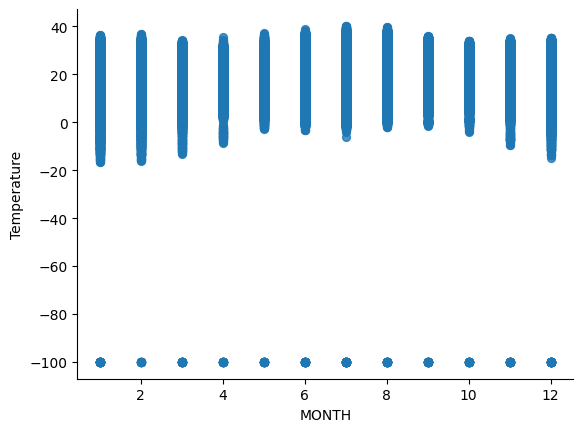

In [ ]:
from matplotlib import pyplot as plt
df_final.plot(kind='scatter', x='MONTH', y='Temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

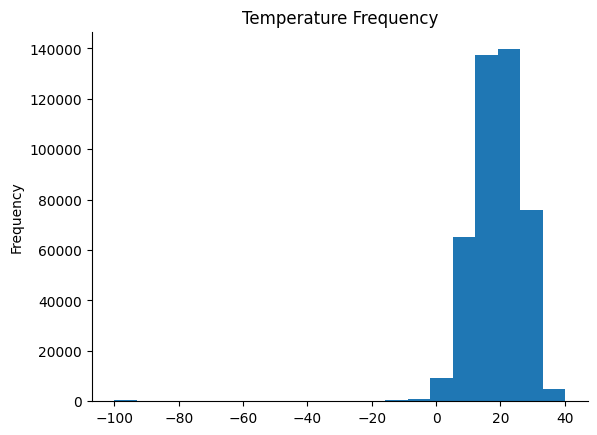

In [ ]:
from matplotlib import pyplot as plt
df_final['Temperature'].plot(kind='hist', bins=20, title='Temperature Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Create a datetime column for sorting
df_final['DATE'] = pd.to_datetime(df_final['YEAR'].astype(str) + '-' + df_final['MONTH'].astype(str) + '-01')

# Sort the DataFrame by the 'DATE' column
df_final = df_final.sort_values('DATE')

# Remove the temporary 'DATE' column if you don't need it in the output
df_final = df_final.drop('DATE', axis=1)

# Write the sorted DataFrame to CSV
df_final.to_csv("output_with_flags_and_inventory_sorted.csv", index=False)



In [ ]:
# prompt: Now generate a code to merge df_dat data frame with df_inv data frame without any id filter.

# Merge the DataFrames without ID filter
df_final = pd.merge(df_combined, df_inv, on='ID', how='left')

# Create a datetime column for sorting
df_final['DATE'] = pd.to_datetime(df_final['YEAR'].astype(str) + '-' + df_final['MONTH'].astype(str) + '-01')

# Sort the DataFrame by the 'DATE' column
df_final = df_final.sort_values('DATE')

# Remove the temporary 'DATE' column if you don't need it in the output
df_final = df_final.drop('DATE', axis=1)

# Write the sorted DataFrame to CSV
df_final.to_csv("output_merged_no_filter.csv", index=False)